# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 571


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
# Help from tutor

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Create endpoint URL with each city
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url + city).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather ["main"]["temp_max"]
        city_humidity = city_weather ["main"]["humidity"]
        city_clouds = city_weather ["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather ["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print (e)
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | atafu village
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | padangsidempuan
Processing Record 8 of Set 1 | alotau
'coord'
City not found. Skipping...
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | wainwright
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | smithers
Processing Record 14 of Set 1 | west island
Processing Record 15 of Set 1 | guerrero negro
Processing Record 16 of Set 1 | aasiaat
Processing Record 17 of Set 1 | island harbour
Processing Record 18 of Set 1 | angra do heroismo
Processing Record 19 of Set 1 | daru
Processing Record 20 of Set 1 | bamboo flat
Processing Record 21 of Set 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,33.53,55,20,11.50,CA,1715117070
1,adamstown,-25.0660,-130.1015,71.22,78,59,9.15,PN,1715117205
2,atafu village,-8.5421,-172.5159,85.10,75,96,11.05,TK,1715117177
3,edinburgh of the seven seas,-37.0676,-12.3116,61.72,78,100,40.87,SH,1715117211
4,waitangi,-43.9535,-176.5597,48.81,82,20,1.01,NZ,1715116996


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,33.53,55,20,11.50,CA,1715117070
1,adamstown,-25.0660,-130.1015,71.22,78,59,9.15,PN,1715117205
2,atafu village,-8.5421,-172.5159,85.10,75,96,11.05,TK,1715117177
3,edinburgh of the seven seas,-37.0676,-12.3116,61.72,78,100,40.87,SH,1715117211
4,waitangi,-43.9535,-176.5597,48.81,82,20,1.01,NZ,1715116996


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

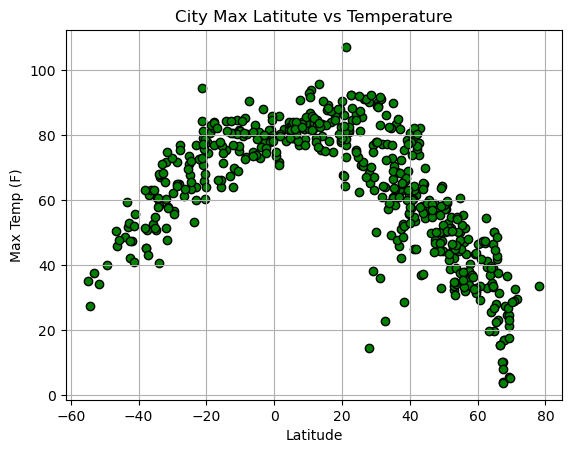

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color="green", edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Max Latitute vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

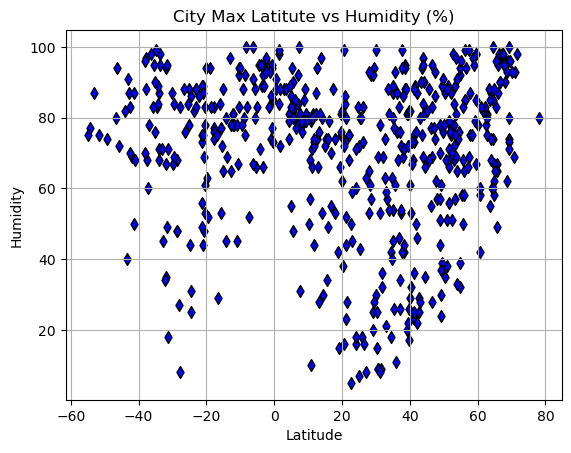

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="d", color="blue", edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Max Latitute vs Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

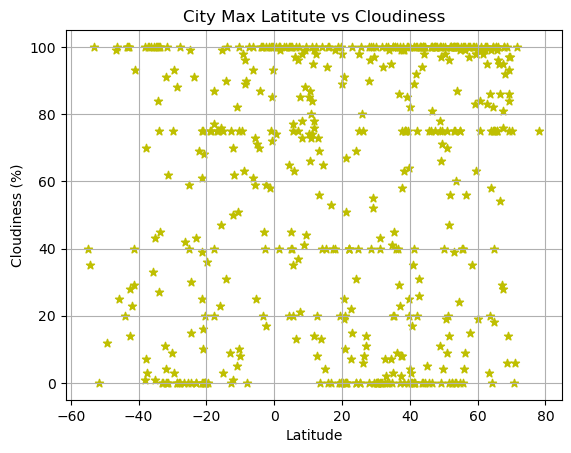

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="*", color="y")

# Incorporate the other graph properties
plt.title("City Max Latitute vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

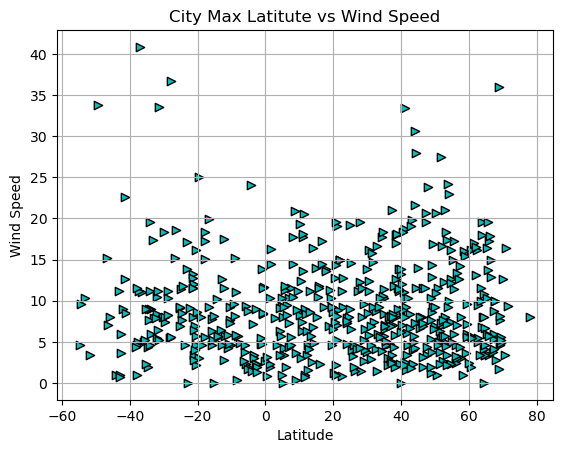

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker=">", color="c", edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Max Latitute vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots

#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,33.53,55,20,11.50,CA,1715117070
6,padangsidempuan,1.3667,99.2667,71.65,98,100,1.97,ID,1715117257
7,yellowknife,62.4560,-114.3525,54.41,78,100,16.11,CA,1715117074
9,wainwright,52.8390,-110.8572,45.16,98,100,12.33,CA,1715117218
11,smithers,54.7804,-127.1743,50.32,32,75,12.66,CA,1715117258


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,71.22,78,59,9.15,PN,1715117205
2,atafu village,-8.5421,-172.5159,85.10,75,96,11.05,TK,1715117177
3,edinburgh of the seven seas,-37.0676,-12.3116,61.72,78,100,40.87,SH,1715117211
4,waitangi,-43.9535,-176.5597,48.81,82,20,1.01,NZ,1715116996
5,grytviken,-54.2811,-36.5092,27.48,77,35,9.62,GS,1715117204


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7044938480561119


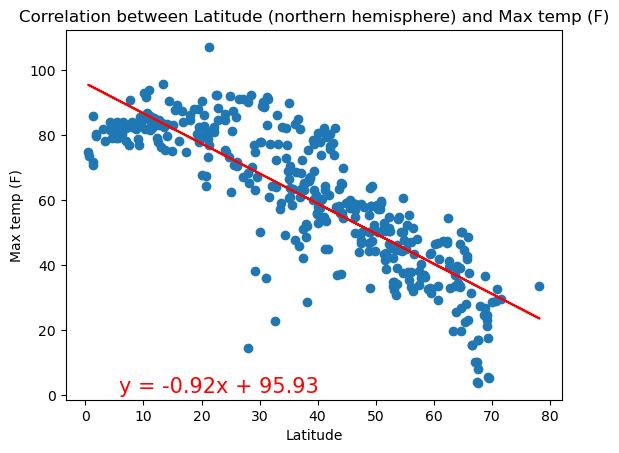

In [17]:
# Linear regression on Northern Hemisphere
no_lat = northern_hemi_df["Lat"]
no_temp = northern_hemi_df["Max Temp"]

slope, intercept, rvalue, pvalue, stderr = linregress(no_lat, no_temp)
regress_values = no_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(no_lat, no_temp)
plt.plot(no_lat,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.title("Correlation between Latitude (northern hemisphere) and Max temp (F)")
plt.xlabel('Latitude')
plt.ylabel('Max temp (F)')

print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.6933717830975549


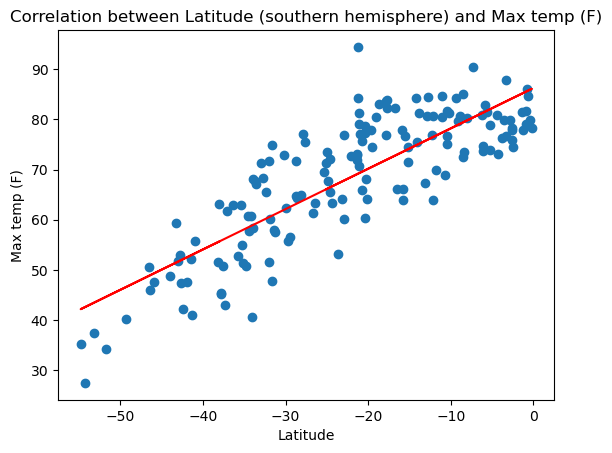

In [18]:
# Linear regression on Southern Hemisphere
so_lat = southern_hemi_df["Lat"]
so_temp = southern_hemi_df["Max Temp"]

slope, intercept, rvalue, pvalue, stderr = linregress(so_lat, so_temp)
regress_values = so_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(so_lat, so_temp)
plt.plot(so_lat,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.title("Correlation between Latitude (southern hemisphere) and Max temp (F)")
plt.xlabel('Latitude')
plt.ylabel('Max temp (F)')

print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In both the northern and southern hemispheres, it is cooler the further away the latitute is from the equator.  The regression lines are quite similar with the northern hemisphere being .7 and the southern at .6.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.017983607284948685


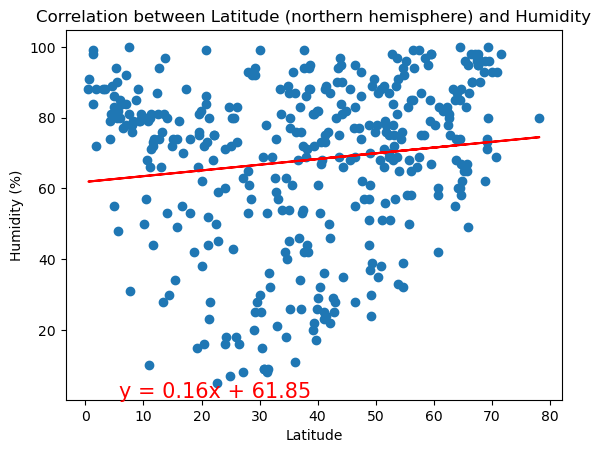

In [19]:
# Northern Hemisphere
no_lat = northern_hemi_df["Lat"]
no_hum = northern_hemi_df["Humidity"]

slope, intercept, rvalue, pvalue, stderr = linregress(no_lat, no_hum)
regress_values = no_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(no_lat, no_hum)
plt.plot(no_lat,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.title("Correlation between Latitude (northern hemisphere) and Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.022311616926030325


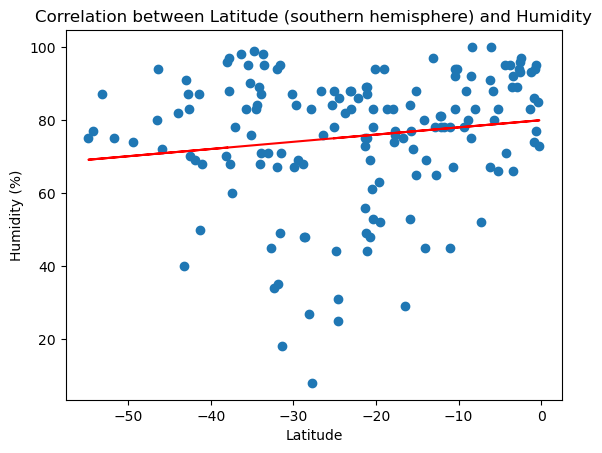

In [20]:
# Southern Hemisphere
so_lat = southern_hemi_df["Lat"]
so_hum = southern_hemi_df["Humidity"]

slope, intercept, rvalue, pvalue, stderr = linregress(so_lat, so_hum)
regress_values = so_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(so_lat, so_hum)
plt.plot(so_lat,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.title("Correlation between Latitude (southern hemisphere) and Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In both hemispheres, there seems to be limited correlation between humidity and distance from the equator.  

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.012387137201018025


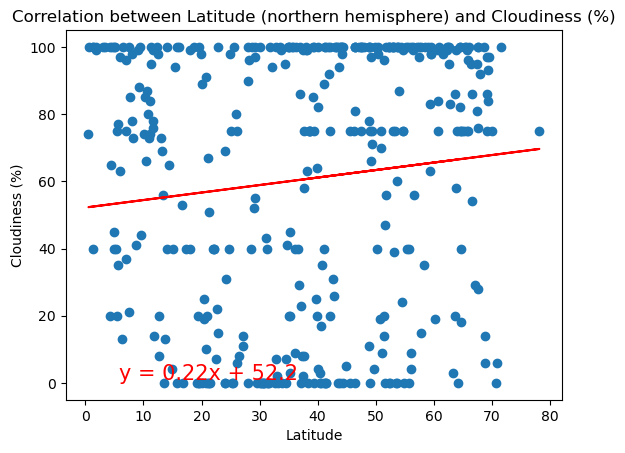

In [21]:
# Northern Hemisphere
no_lat = northern_hemi_df["Lat"]
no_clouds = northern_hemi_df["Cloudiness"]

slope, intercept, rvalue, pvalue, stderr = linregress(no_lat, no_clouds)
regress_values = no_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(no_lat, no_clouds)
plt.plot(no_lat,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.title("Correlation between Latitude (northern hemisphere) and Cloudiness (%)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.027125077107976937


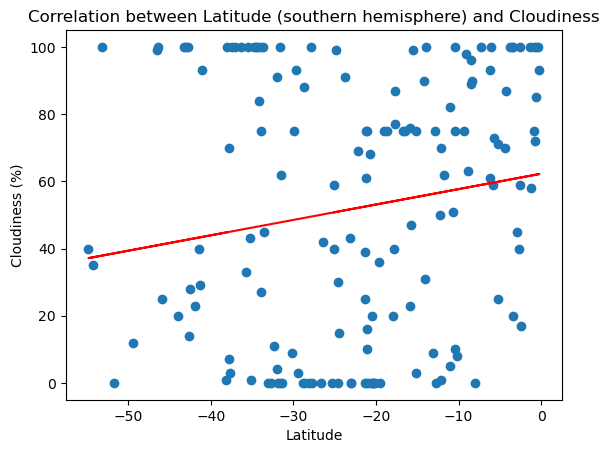

In [22]:
# Southern Hemisphere
so_lat = southern_hemi_df["Lat"]
so_clouds = southern_hemi_df["Cloudiness"]

slope, intercept, rvalue, pvalue, stderr = linregress(so_lat, so_clouds)
regress_values = so_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(so_lat, so_clouds)
plt.plot(so_lat,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.title("Correlation between Latitude (southern hemisphere) and Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There is a slightly stronger chance of cloudiness closer to the equator, but the correlation is low.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.003588995294524409


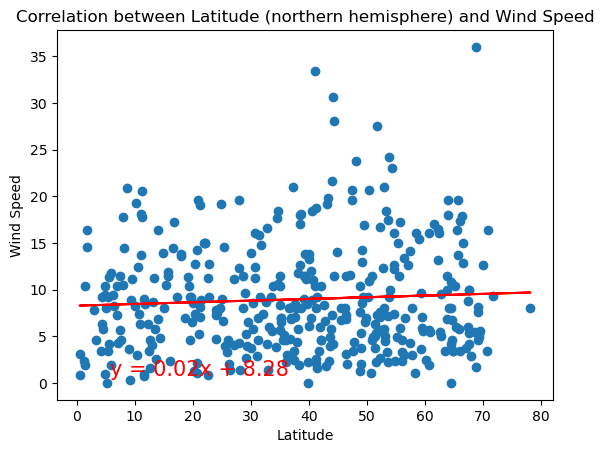

In [23]:
# Northern Hemisphere
no_lat = northern_hemi_df["Lat"]
no_wind = northern_hemi_df["Wind Speed"]

slope, intercept, rvalue, pvalue, stderr = linregress(no_lat, no_wind)
regress_values = no_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(no_lat, no_wind)
plt.plot(no_lat,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.title("Correlation between Latitude (northern hemisphere) and Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.03263858956673076


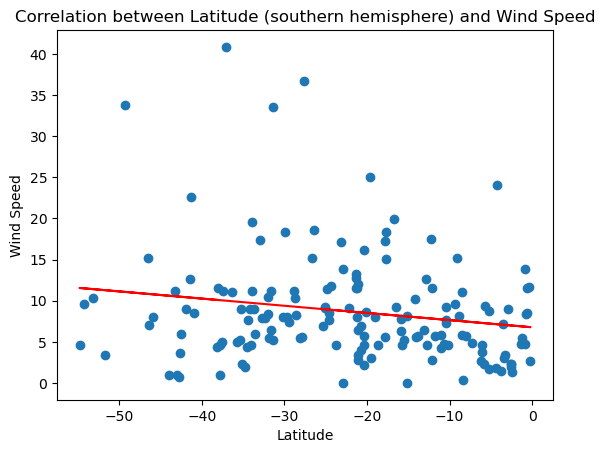

In [24]:
# Southern Hemisphere
so_lat = southern_hemi_df["Lat"]
so_wind = southern_hemi_df["Wind Speed"]

slope, intercept, rvalue, pvalue, stderr = linregress(so_lat, so_wind)
regress_values = so_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(so_lat, so_wind)
plt.plot(so_lat,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.title("Correlation between Latitude (southern hemisphere) and Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Wind speeds and latitude also have a weak correlation in both hemispheres.  However, the further south from the equator, there seems to be a few more outliers.